# **UTS**

## Analisis Data menggunakan metode KNN dan Decision Tree 


### **Implementasi KNN**

#### Langkah-langkah 


*   Impor modul *train_test_split* dari *sklearn*
*   Impor modul *KNeighborsClassifier* dari *sklearn*
*   Impor modul *pandas library*



In [ ]:
from sklearn.model_selection import train_test_split #split dataset into train and test data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [ ]:
dataset_url = "https://raw.githubusercontent.com/Ihsan210702/dataset/main/dataR2.csv"

In [ ]:
df = pd.read_csv(dataset_url)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
#check number of rows and columns in dataset
df.shape

(116, 10)

#### Menghitung Data

*   Pisahkan kolom "classification" dari *dataframe*
*   Ambil kolom "classification" sebagai target kolom untuk kategori kelas
*   Pisahkan data latih dengan data tes


```
# data latih (nilai data)
X_train 

# data tes (nilai data)
X_test 

# data latih (kelas data)
y_train

# data tes (kelas data)
y_test
```





In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["Classification"])#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
# separate target values
y = df["Classification"].values  # view target values
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_amount_of_test_data = 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = percent_amount_of_test_data, random_state=1, stratify=y)



*   Tentukan nilai K = 10 (10 tetangga terdekat)
*   Buat data latih


```
knn_classifier.fit(train_data)
```




In [ ]:
amount_of_neighbor = 10

In [ ]:
# Fit the classifier to the data
knn = KNeighborsClassifier(n_neighbors = amount_of_neighbor)

# create train data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)



*   Tes data target terhadap data latih
*   Tampilkan predksi 10 data pertama



```
knn_classifier.predict(test_data)
```





In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2])



*   Cetak prediksi nilai dari data tes



```
knn_classifier.score(test_data)
```





In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.5

*  Cek sebuah data dengan nilai 


```
# Test Data (1)
[
    [
        45, 
        21.30394858, 
        102, 
        13.852, 
        3.4851632, 
        7.6476, 
        21.056625, 
        23.03408,	
        552.444
    ]
]
```



In [ ]:
# Custom value to predict (1) based on manual calculation
knn.predict([[68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220	]])

array([1])

In [ ]:
# Custom value to predict (2)
knn.predict([[83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786]])

array([2])

In [ ]:
# Custom value to predict (3) based on manual calculation
knn.predict([[20,35,   79,2.5, 0.4,     25,   32,   3.1, 393]])

array([1])

### Kesimpulan


*   Dataset Breast Cancer Combria terdiri dari 116 data
*   Ambil **80%** dari data Breast Cancer Combria sebagai **data latih**
*   Ambil **20%** dari data Breast Cancer Combria sebagai **data tes**
*   Tetapkan nilai K = 10
*   Hasil 10 data pertama dari 20% data latih


```
"""
1 = Healthy controls 
2 = Patients
"""
[1, 1, 1, 2, 1, 2, 2, 2, 2, 1]
```
*   Dengan akurasi data yaitu $ 0.5\% $





### **Implementasi Decision Tree**


#### **Algoritma**


1.   Memilih atribut terbaik menggunakan Attribution Selection Measures (ASM) untuk membagi records data
2.   Membuat atribut menjadi decision node dan memecah dataset menjadi subsets yang lebih kecil.
3.   Mulai membangun pohon dengan mengulangi proses ini secara rekursif, untuk setiap cabang sampai salah satu dari kondisi tersebut akan cocok



In [ ]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
url = 'https://raw.githubusercontent.com/Ihsan210702/dataset/main/dataR2.csv'
data = pd.read_csv(url)

In [ ]:
data.head(-1)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
110,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280,2
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2


In [ ]:
# x sebagai variable independent
x = data.drop(['Classification'], axis = 1)
x.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554

In [ ]:
# y sebagai variable dependent
y = data['Classification']
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [ ]:
print(x_train)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
43    69  32.500000       93    5.430  1.245642  15.1450    11.787960   
98    71  27.915519      104   18.200  4.668907  53.4997     1.656020   
80    59  28.672626       77    3.188  0.605507  17.0220    16.440480   
72    51  18.370000      105    6.030  1.561770   9.6200    12.760000   
31    53  36.790166      101   10.175  2.534932  27.1841    20.030000   
..   ...        ...      ...      ...       ...      ...          ...   
76    55  31.975015       92   16.635  3.775036  37.2234    11.018455   
10    34  21.470000       78    3.469  0.667436  14.5700    13.110000   
28    35  35.250761       90    6.817  1.513374  50.6094     6.966895   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
49    85  26.600000       96    4.462  1.056602   7.8500     7.931700   

     Resistin    MCP.1  
43   11.78796  270.142  
98   49.24184  256.001  
80   31.69040  910.489  
72    3.21000  513.660 

In [ ]:
# membangun decision tree menggunakan gini
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train,y_train)

#Prediksi data test
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.69      0.75        13
           2       0.78      0.88      0.82        16

    accuracy                           0.79        29
   macro avg       0.80      0.78      0.79        29
weighted avg       0.80      0.79      0.79        29



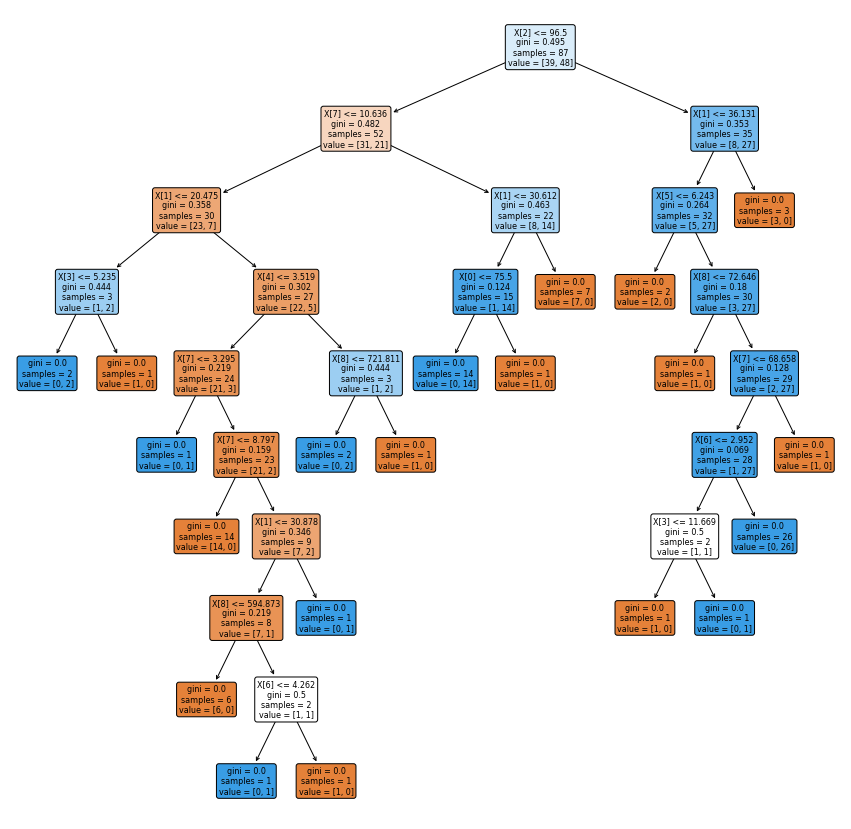

In [ ]:
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()